<h1 style="text-align: center; background-color:#000080; color: white; font-size: 60px; padding: 50px;"> INSURANCE CUSTOMER RESPONSE PREDICTION </h1>

## ----------------------------------------------------------------------------------------------------------

<img src="https://www.renewbuy.com/sites/default/files/2023-08/Motor%20Insurance%20%282%29.png" width="1200">

## ----------------------------------------------------------------------------------------------------------

#### 
Problem Statement: Develop a robust machine learning model to accurately predict customer responses to insurance policy offers. By utilizing this model, the company aims to improve targeted marketing, optimize their sales channel strategy, and increase the efficiency of their policy sales process.




Project Overview:
This project aims to enhance the understanding of customer behavior and improve the policy sales process in the insurance industry. By leveraging machine learning, the project seeks to predict customer responses to insurance policy offers based on various customer and policy characteristics. The goal is to develop a robust machine learning model that accurately forecasts customer responses, enabling improved targeted marketing, optimized sales channel strategies, and increased efficiency in the policy sales process.


 

Project Benefits: 
Customer Insights: The model will help identify factors influencing customer decisions, allowing for more targeted marketing strategies. 
Sales Channel Optimization: Understanding which channels are most effective for different customer segments can improve resource allocation. 
Improved Conversion Rates: Predicting customer responses can lead to more personalized offers and higher conversion rates. 

 


Deliverables: 
A documented machine learning model specifically designed for predicting customer responses to insurance policy offers. 
Comprehensive data visualizations illustrating relationships between various customer features and their likelihood to respond positively. 
A comparative analysis of different machine learning algorithms for this classification task. 
 

## ----------------------------------------------------------------------------------------------------------

 ####                   💡 About The data Columns :
We're studying to predict which customers respond positively to an automobile insurance offer.

🥨Gender: Categorical variable indicating the gender of the customer.

🌭Age: Numeric variable indicating the age of the customer.

🥓Driving_License: Binary variable indicating if the customer has a driving license (1 if yes, 0 if no).

🚜Region_Code: Numeric variable indicating the region code of the customer.

🥡Previously_Insured: Binary variable indicating if the customer was previously insured (1 if yes, 0 if no).
🖼Vehicle_Age: Categorical variable indicating the age of the vehicle.

🕸Vehicle_Damage: Categorical variable indicating if the vehicle was damaged in the past.

🕶Annual_Premium: Numeric variable indicating the annual premium amount.

🎡Policy_Sales_Channel: Numeric variable indicating the sales channel of the policy.

🎢Vintage: Numeric variable indicating the number of days the customer has been associated with the company.

🎞Response: Binary target variable indicating if the customer responded positively to the automobile insurance offer (1 if yes, 0 if no).

## ----------------------------------------------------------------------------------------------------------

####
Task: The objective of this project is to predict which customers respond positively to an automobile insurance offer.

Evaluation: Submissions are evaluated using area under the ROC curve.



## ----------------------------------------------------------------------------------------------------------

## 1.Import libraries

In [ ]:
import pandas as pd                    # for data manipulation and analysis and is used to work with structured data using dataframes
import numpy as np                     # for numerical computations,used for creating arrays etc.
import matplotlib.pyplot as plt        # for creating visualizations
from sklearn.model_selection import train_test_split            # for splitting the dataset into training and testing sets.
from sklearn.metrics import mean_squared_error                  # to evaluate the performance of regression models(measures the difference between predicted and actual values).
from xgboost import XGBRegressor                                # use for training and making predictions for regression tasks
# import gc                                                       # gc(garbage collection) use for managing memory


import warnings
warnings.filterwarnings("ignore")                               # used to ignore and filters warnings

## 2.Load the dataset

In [ ]:
insurance_cust=pd.read_csv(r"data.csv")
# Loads the dataset from a CSV file named data.csv into a pandas DataFrame (insurance_cust

insurance_cust.head()
# Displays the dataset

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0    217.0   
1    1-2 Year             No         33536.0                  26.0    183.0   
2   > 2 Years            Yes         38294.0                  26.0     27.0   
3    < 1 Year             No         28619.0                 152.0    203.0   
4    < 1 Year             No         27496.0                 152.0     39.0   

   Response  
0       1.0  
1       0.0  
2       1.0  
3       0.0  
4       0.0

## 3.EDA 

In [ ]:
insurance_cust.info()
# display data info,datatypes,non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168906 entries, 0 to 168905
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168906 non-null  int64  
 1   Gender                168906 non-null  object 
 2   Age                   168906 non-null  int64  
 3   Driving_License       168906 non-null  int64  
 4   Region_Code           168906 non-null  float64
 5   Previously_Insured    168906 non-null  int64  
 6   Vehicle_Age           168906 non-null  object 
 7   Vehicle_Damage        168905 non-null  object 
 8   Annual_Premium        168905 non-null  float64
 9   Policy_Sales_Channel  168905 non-null  float64
 10  Vintage               168905 non-null  float64
 11  Response              168905 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 15.5+ MB


In [ ]:
insurance_cust.describe().T
# summary stats for numerical columns

count          mean           std     min       25%  \
id                    168906.0  84453.500000  48759.106621     1.0  42227.25   
Age                   168906.0     38.820445     15.508319    20.0     25.00   
Driving_License       168906.0      0.997863      0.046181     0.0      1.00   
Region_Code           168906.0     26.401756     13.234180     0.0     15.00   
Previously_Insured    168906.0      0.456763      0.498129     0.0      0.00   
Annual_Premium        168905.0  30511.513277  17197.895108  2630.0  24382.00   
Policy_Sales_Channel  168905.0    112.011527     54.218168     1.0     29.00   
Vintage               168905.0    154.461745     83.703246    10.0     82.00   
Response              168905.0      0.122601      0.327980     0.0      0.00   

                          50%        75%       max  
id                    84453.5  126679.75  168906.0  
Age                      36.0      49.00      85.0  
Driving_License           1.0       1.00       1.0  
Region_Code              28.0      35.00      52.0  
Previously_Insured        0.0       1.00       1.0  
Annual_Premium        31615.0   39347.00  540165.0  
Policy_Sales_Channel    133.0     152.00     163.0  
Vintage                 154.0     227.00     299.0  
Response                  0.0       0.00       1.0

In [ ]:
insurance_cust.columns.values
# Display thr columns in data.

array(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype=object)

In [ ]:
insurance_cust.isnull().sum()
# Counts missing values per column

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          1
Annual_Premium          1
Policy_Sales_Channel    1
Vintage                 1
Response                1
dtype: int64

In [ ]:
insurance_cust.Response.value_counts()
# Displaying "Response" counts

Response
0.0    148197
1.0     20708
Name: count, dtype: int64

#### 
- Handle inbalance data

In [ ]:
insurance_cust2=insurance_cust.copy()
# Creates a copy of the insurance_cust DataFrame and stores it in insurance_cust2

In [ ]:
insurance_cust.drop(columns=["id"],axis=1,inplace=True)
# drop(columns=["id"], axis=1): Removes the column named "id" from the insurance_cust DataFrame.
# axis=1 specifies that we are dropping a column (not a row).
# inplace=True: Modifies the insurance_cust DataFrame directly without needing to create a new one.

In [ ]:
insurance_cust.head()
# Displays the data after dropping a column

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0    217.0       1.0  
1             No         33536.0                  26.0    183.0       0.0  
2            Yes         38294.0                  26.0     27.0       1.0  
3             No         28619.0                 152.0    203.0       0.0  
4             No         27496.0                 152.0     39.0       0.0

In [ ]:
insurance_cust["Vehicle_Damage"].replace(to_replace="Yes",value=1,inplace=True)
insurance_cust["Vehicle_Damage"].replace(to_replace="No",value=0,inplace=True)
# Replaces "Yes" with 1 and "No" with 0 in the "Vehicle_Damage" column, converting it to a binary format (1 for "Yes", 0 for "No").
#inplace=True modifies the DataFrame directly.

insurance_cust.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0             1.0         40454.0                  26.0    217.0       1.0  
1             0.0         33536.0                  26.0    183.0       0.0  
2             1.0         38294.0                  26.0     27.0       1.0  
3             0.0         28619.0                 152.0    203.0       0.0  
4             0.0         27496.0                 152.0     39.0       0.0

#### 
- Convert categorical variable into dummy variables

In [ ]:
insurance_cust_dummies=pd.get_dummies(insurance_cust)
# Converts categorical columns in insurance_cust to dummy variables (also known as one-hot encoding)

insurance_cust_dummies.info()
#  Displays a summary of the new DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168906 entries, 0 to 168905
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    168906 non-null  int64  
 1   Driving_License        168906 non-null  int64  
 2   Region_Code            168906 non-null  float64
 3   Previously_Insured     168906 non-null  int64  
 4   Vehicle_Damage         168905 non-null  float64
 5   Annual_Premium         168905 non-null  float64
 6   Policy_Sales_Channel   168905 non-null  float64
 7   Vintage                168905 non-null  float64
 8   Response               168905 non-null  float64
 9   Gender_Female          168906 non-null  bool   
 10  Gender_Male            168906 non-null  bool   
 11  Vehicle_Age_1          168906 non-null  bool   
 12  Vehicle_Age_1-2 Year   168906 non-null  bool   
 13  Vehicle_Age_< 1 Year   168906 non-null  bool   
 14  Vehicle_Age_> 2 Years  168906 non-nu

In [ ]:
insurance_cust_dummies.head()

Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Damage  \
0   44                1         28.0                   0             1.0   
1   76                1          3.0                   0             0.0   
2   47                1         28.0                   0             1.0   
3   21                1         11.0                   1             0.0   
4   29                1         41.0                   1             0.0   

   Annual_Premium  Policy_Sales_Channel  Vintage  Response  Gender_Female  \
0         40454.0                  26.0    217.0       1.0          False   
1         33536.0                  26.0    183.0       0.0          False   
2         38294.0                  26.0     27.0       1.0          False   
3         28619.0                 152.0    203.0       0.0          False   
4         27496.0                 152.0     39.0       0.0           True   

   Gender_Male  Vehicle_Age_1  Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  \
0         True          False                 False                 False   
1         True          False                  True                 False   
2         True          False                 False                 False   
3         True          False                 False                  True   
4        False          False                 False                  True   

   Vehicle_Age_> 2 Years  
0                   True  
1                  False  
2                   True  
3                  False  
4                  False

## 4.Data Visualization

In [ ]:
import seaborn as sns
# Seaborn library a Python library for data visualization

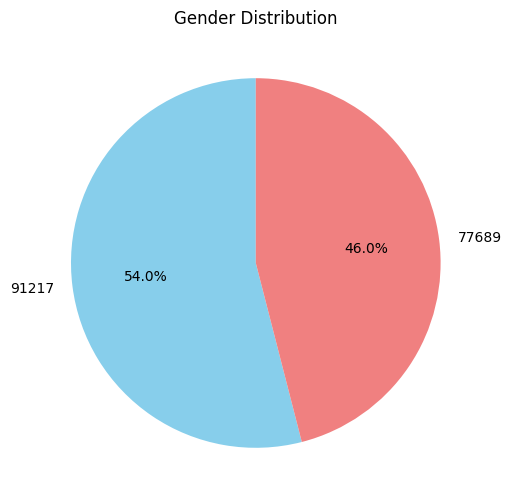

In [ ]:
gender_counts = insurance_cust['Gender'].value_counts()
#value_counts(): Counts occurrences of each gender in the Gender column.

plt.figure(figsize=(6, 6)) # Sets the figure size to 6x6 inches.
plt.pie(gender_counts, labels=gender_counts, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
# labels: Gender labels, autopct='%1.1f%%': Shows percentages with 1 decimal.
# colors: Assigns colors (skyblue and lightcoral) , startangle=90: Starts the 1st segment at 90 degrees.
plt.title('Gender Distribution')    # Adds the chart title.
plt.show()                          # Displays the pie chart.

#### 
- Pie chart represents the gender distribution of a dataset. Here's the explanation:

The chart is divided into two segments:
Blue Segment (54%): Represents 91,217 individuals, which corresponds to one gender (likely male or female).
Red Segment (46%): Represents 77,689 individuals, corresponding to the other gender.
The percentages and counts indicate that there are slightly more individuals in the blue segment (54%) compared to the red segment (46%).

This distribution might be used for understanding demographic proportions, ensuring data balance, or analyzing trends based on gender.

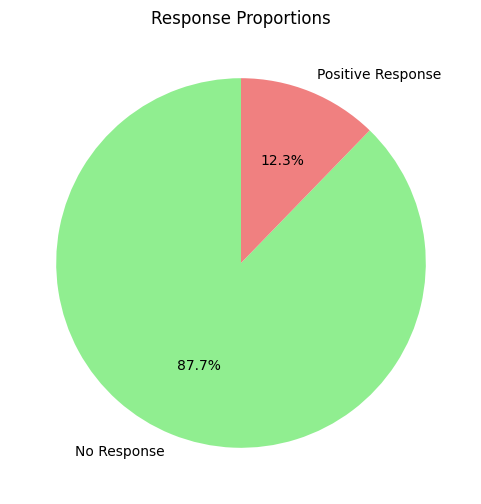

In [ ]:
response_counts = insurance_cust['Response'].value_counts()
# .value_counts(): Counts the occurrences of each unique value in the "Response" column (e.g., "No Response" and "Positive Response").

plt.figure(figsize=(6, 6))
plt.pie(response_counts, labels=['No Response', 'Positive Response'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
# labels=['No Response', 'Positive Response']: Customizes the labels for the chart, autopct='%1.1f%%': Displays the percentage of each category in the pie chart.
#colors=['lightgreen', 'lightcoral']: Sets the colors for the two categories, startangle=90: Rotates the start angle of the pie chart.

plt.title('Response Proportions')          # Adds a title to the chart
plt.show()                                 # Displays the pie chart

####
- The pie chart shows that only a small portion (12.3%) of responses were positive, while the vast majority (87.7%) were "No Response." This suggests low engagement or potentially negative sentiment towards the subject matter.

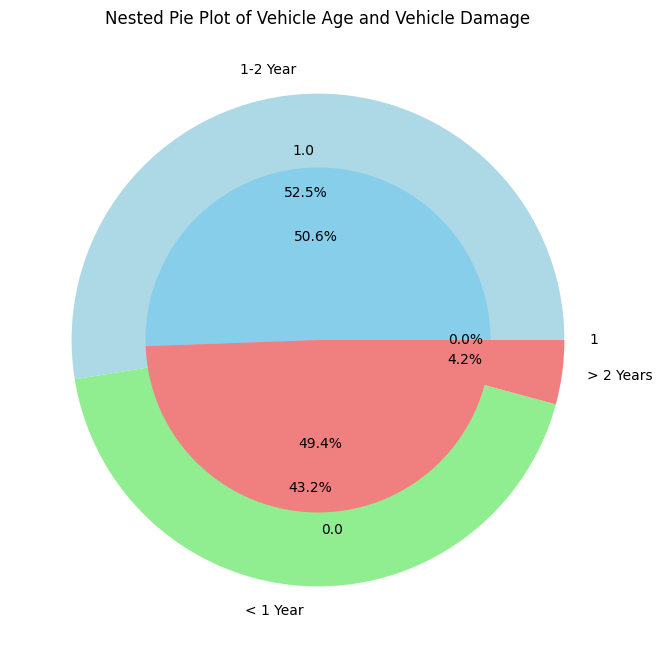

In [ ]:
vehicle_age_counts = insurance_cust['Vehicle_Age'].value_counts()
#value_counts():Counts occurrences in Vehicle_Age and Vehicle_Damage columns

vehicle_damage_counts = insurance_cust['Vehicle_Damage'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
# plt.subplots():Creates a figure and axis for the plot, with size 8x8.

ax.pie(vehicle_age_counts, labels=vehicle_age_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], radius=1)
# Outer Pie (Vehicle Age):-
# vehicle_age_counts: Data for outer pie , Colors: ['lightblue', 'lightgreen', 'lightcoral'].
# radius=1: Outer circle.

ax.pie(vehicle_damage_counts, labels=vehicle_damage_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], radius=0.7)
# Inner Pie (Vehicle Damage):-
#vehicle_damage_counts: Data for inner pie, Colors: ['skyblue', 'lightcoral'].
#radius=0.7: Inner circle.

ax.set(aspect="equal", title='Nested Pie Plot of Vehicle Age and Vehicle Damage')
#ax.set(aspect="equal"): Ensures the pie chart is circular.
plt.show()                # Displays the nested pie chart

#### 
- The chart shows that while a majority of vehicles have some level of damage, older vehicles (over 2 years) tend to have slightly more damage (49.4%) compared to newer vehicles (1-2 years, 52.5%). This suggests that age may be a factor in vehicle damage.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming insurance_cust is a pandas DataFrame
# Define a custom dark color palette
dark_palette = ['#1e3a5f', '#AA336A', '#D8BFD8'] # A dark color palette is defined for the bars.

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram using seaborn
sns.histplot(
    data=insurance_cust,
    x='Vehicle_Age',
    hue='Vehicle_Age',
    palette=dark_palette,
    multiple='dodge',  # Ensure bars for each group are separated
    shrink=0.8,  # Adjust bar width
    ax=ax
)
#X-axis: Vehicle_Age.
#Bars colored by Vehicle_Age categories.
#Bars are separated (multiple='dodge') and resized (shrink=0.8).

# Customize the plot
ax.set_title('Distribution of Classes', fontsize=16, color='#13274F')
ax.set_xlabel('Class', fontsize=14, color='#13274F')
ax.set_ylabel('Count', fontsize=14, color='#13274F')

# Customize tick labels' colors
ax.tick_params(axis='x', colors='#13274F')
ax.tick_params(axis='y', colors='#13274F')

# Adjust layout for margins
plt.tight_layout()    #tight_layout adjusts margins to avoid overlaps.

# Show the plot
plt.show()  #the plot is displayed using plt.show().

####
-This graph represents most vehicles are 1-2 Years old, followed by <1 Year, with the least being >2 Years.

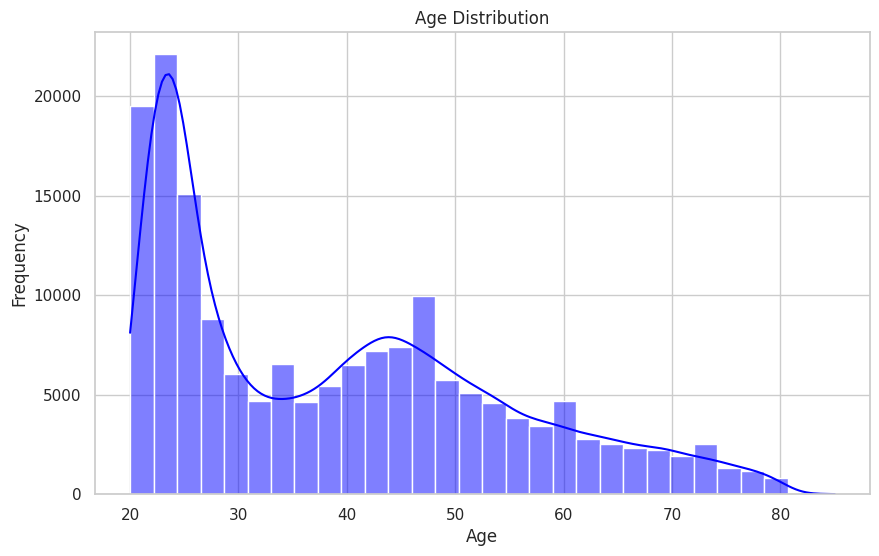

In [ ]:
sns.set(style="whitegrid")
# Sets the plot style to a white grid for better visibility

plt.figure(figsize=(10, 6))       # Sets the plot size to 10x6 inches
sns.histplot(insurance_cust['Age'], bins=30, kde=True, color='blue')
# insurance_cust['Age']: Plots the Age column from the dataset , bins=30: Divides the data into 30 bins.
#kde=True: Adds a KDE curve to visualize the distribution , color='blue': Sets the color of the plot to blue

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Adds a title, x-axis label, and y-axis label.

plt.show()         # Display the plot

#### 
- The graph shows an age distribution that is right-skewed, meaning it has a longer tail towards older ages. The peak of the distribution is in the 20-30 age range, indicating that this age group has the highest representation.

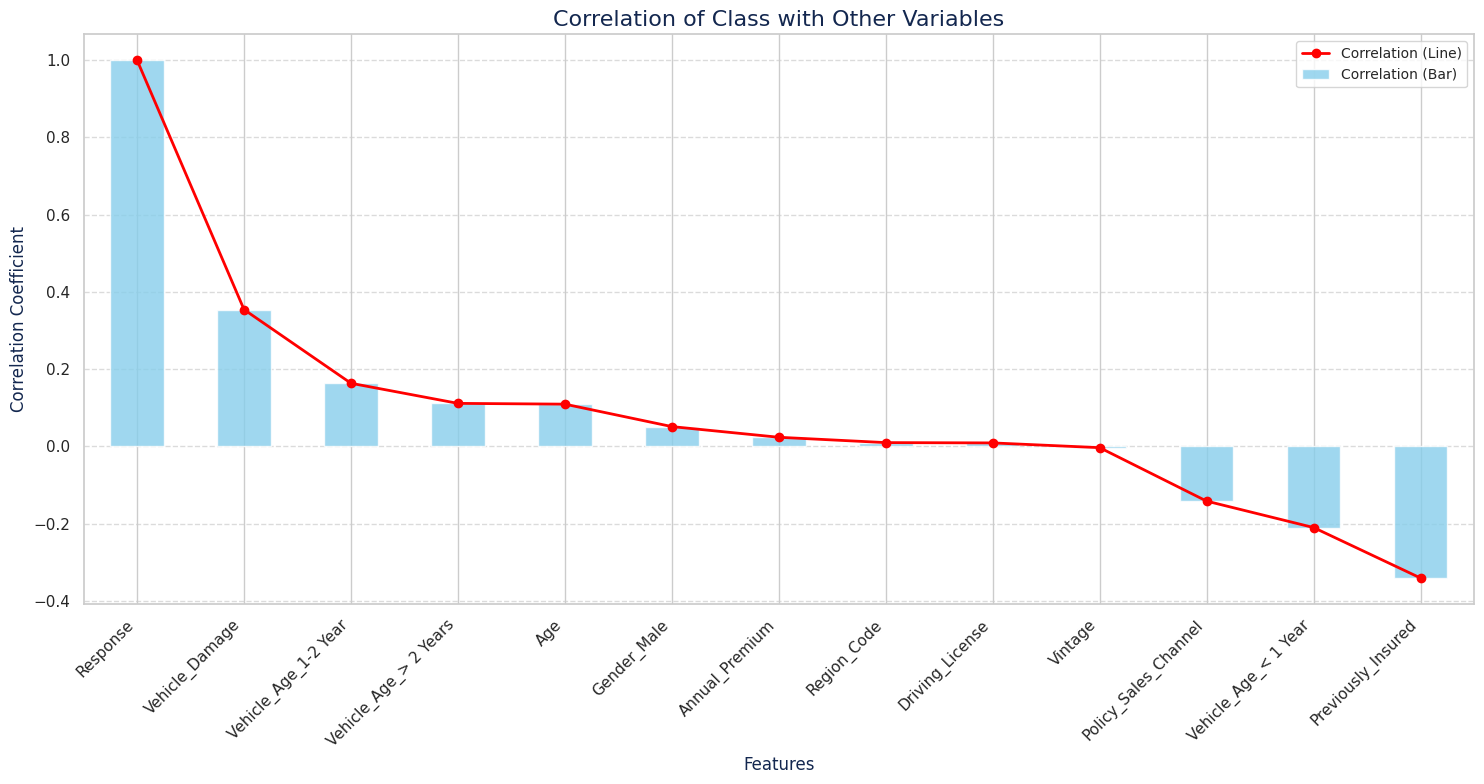

In [ ]:
#  visualizes the correlations of features with the target variable (Response)
# Compute correlations

correlations = insurance_cust.corr()['Response'].sort_values(ascending=False)
# insurance_cust.corr()['Response']: Computes correlations between all columns and Response.
# sort_values(ascending=False): Sorts correlations in descending order.

# Create the figure
plt.figure(figsize=(15, 8))

# Plot the bar chart
correlations.plot(kind='bar', color='skyblue', alpha=0.8, label='Correlation (Bar)')   #  Plots a bar chart of correlations with Response.

# Overlay a line plot: Adds a red line plot showing correlation values.
plt.plot(correlations.index, correlations.values, color='red', marker='o', linewidth=2, label='Correlation (Line)')

# Add title and labels
plt.title('Correlation of Response with Other Variables', fontsize=16, color='#13274F')
plt.xlabel('Features', fontsize=12, color='#13274F')
plt.ylabel('Correlation Coefficient', fontsize=12, color='#13274F')

# Add legend
plt.legend(fontsize=10)
# plt.legend(): Adds a legend to differentiate the line and bar.

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better  clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()         #Adjusts layout to avoid overlap.

# Show the plot
plt.show()


####
- The graph shows correlations between a "Class" variable and other variables. "Response" has the strongest positive correlation with "Class," suggesting a strong association. "Vehicle_Damage" has a moderate positive correlation, while other variables show weak or no correlation.

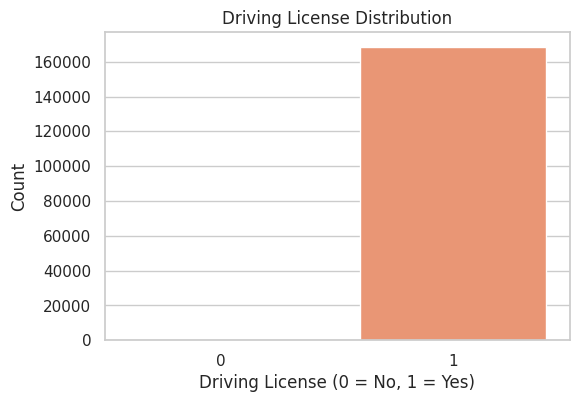

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Driving_License', data=insurance_cust, palette='Set2')
# Plots the count of Driving_License values (0 = No, 1 = Yes).
# palette='Set2': Uses a predefined color palette for the plot

plt.title('Driving License Distribution')
plt.xlabel('Driving License (0 = No, 1 = Yes)')
plt.ylabel('Count')
# plt.title(), plt.xlabel(), plt.ylabel(): Adds the title and labels for x and y axes.

plt.show()

####
- The graph shows that a vast majority of the population in the dataset possesses a driving license. The bar representing individuals with licenses is significantly taller than the bar for those without.

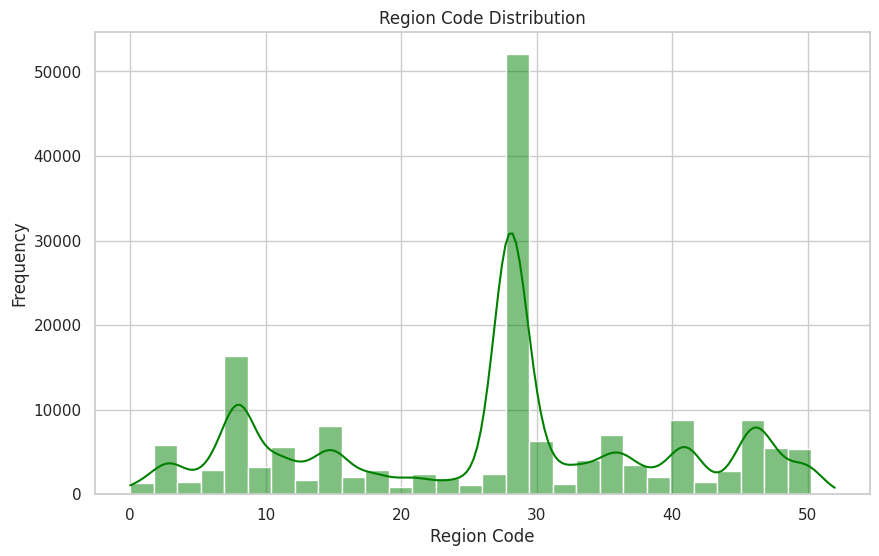

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_cust['Region_Code'], bins=30, kde=True, color='green')
# insurance_cust['Region_Code']: Plots the Region_Code column.
# bins=30: Divides the data into 30 bins.
# kde=True: Adds a KDE curve to visualize the distribution.
# color='green': Sets the plot color to green

plt.title('Region Code Distribution')
plt.xlabel('Region Code')
plt.ylabel('Frequency')
plt.show()

####
- The graph shows an uneven distribution of Region Codes. A region code around 30 has the highest frequency, while other regions have varying levels of representation.



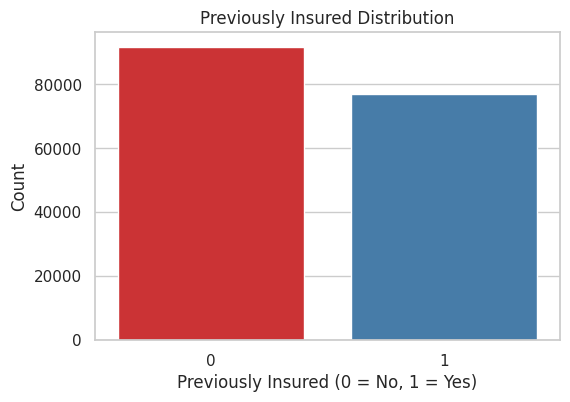

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Previously_Insured', data=insurance_cust, palette='Set1')
# Plots the count of Previously_Insured values (0 = No, 1 = Yes).
# palette='Set1': Uses a predefined color palette for the plot.

plt.title('Previously Insured Distribution')
plt.xlabel('Previously Insured (0 = No, 1 = Yes)')
plt.ylabel('Count')
# plt.title(), plt.xlabel(), plt.ylabel(): Adds the title and labels for the x and y axes

plt.show()

####
- The graph shows that a majority of individuals in the dataset were not previously insured. The bar representing "Not Previously Insured" is significantly taller than the bar for "Previously Insured."

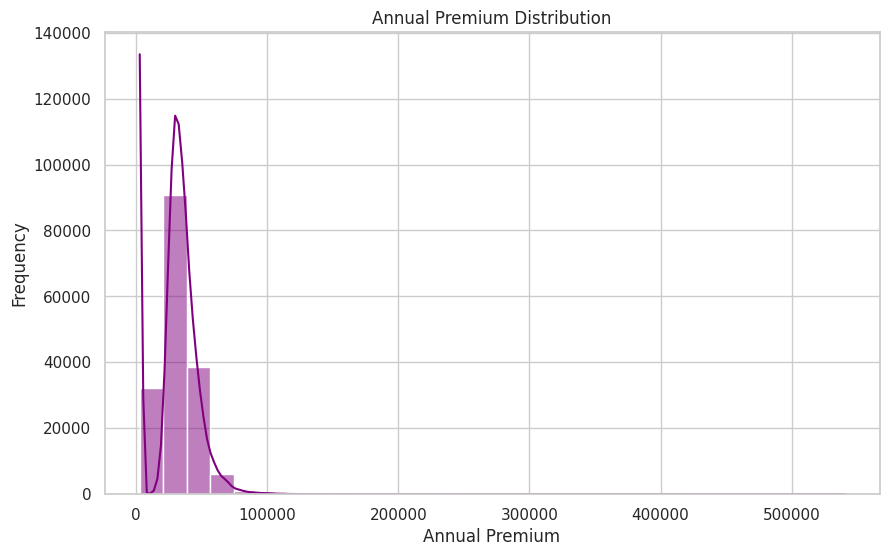

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_cust['Annual_Premium'], bins=30, kde=True, color='purple')
# insurance_cust['Annual_Premium']: Plots the Annual_Premium column.
# bins=30: Divides the data into 30 bins.
# kde=True: Adds a KDE curve to visualize the premium distribution.
# color='purple': Sets the plot color to purple.

plt.title('Annual Premium Distribution')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
# plt.title(), plt.xlabel(), plt.ylabel(): Adds a title and axis labels.

plt.show()

####
- The graph shows a right-skewed distribution of Annual Premiums. This means most premiums are lower, with a few policies having much higher premiums.


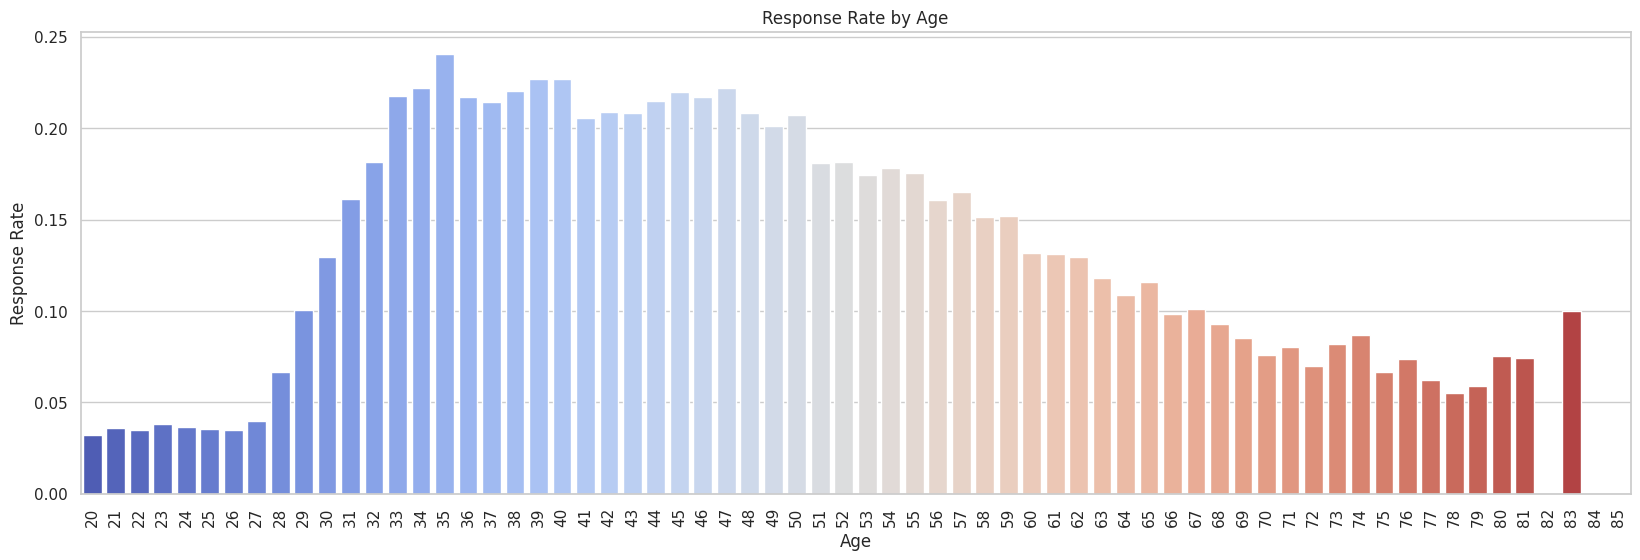

In [ ]:
plt.figure(figsize=(20, 6))
age_response = insurance_cust.groupby('Age')['Response'].mean().reset_index()
# Groups data by Age and calculates the average response rate for each age.
# reset_index(): Converts the result back to a DataFrame

sns.barplot(x='Age', y='Response', data=age_response, palette='coolwarm')
# x='Age', y='Response': Plots age on the x-axis and response rate on the y-axis.
# palette='coolwarm': Applies a color gradient to the bars.

plt.title('Response Rate by Age')
plt.xlabel('Age')
plt.ylabel('Response Rate')
# Adds a title (Response Rate by Age) and labels for the x-axis (Age) and y-axis (Response Rate).

plt.xticks(rotation=90)
# plt.xticks(rotation=90): Rotates the x-axis labels for better readability.

plt.show()

####
-The graph shows a U-shaped pattern in Response Rate by Age. Response rates are highest in the mid-30s to early 40s age range and lower for both younger and older age groups.

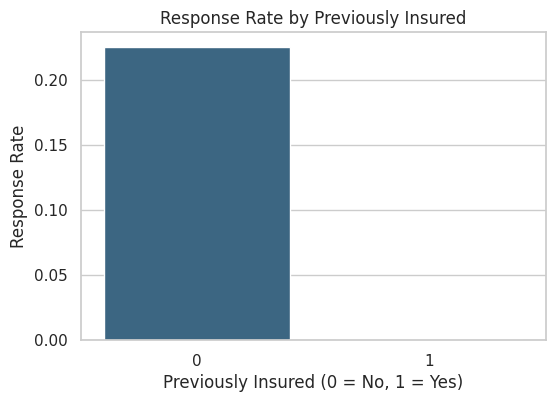

In [ ]:
plt.figure(figsize=(6, 4))
insured_response = insurance_cust.groupby('Previously_Insured')['Response'].mean().reset_index()
# insurance_cust.groupby('Previously_Insured')['Response'].mean(): Calculates the average response rate for each Previously_Insured category.
# reset_index(): Converts it into a DataFrame.

sns.barplot(x='Previously_Insured', y='Response', data=insured_response, palette='viridis')

# Shows the response rate for: 0 (Not Insured), 1 (Previously Insured).
# palette='viridis': Adds a color gradient.

plt.title('Response Rate by Previously Insured')
plt.xlabel('Previously Insured (0 = No, 1 = Yes)')
plt.ylabel('Response Rate')
plt.show()

####
- This graph shows that the customers not previously insured (0) show a higher response rate than those previously insured (1).

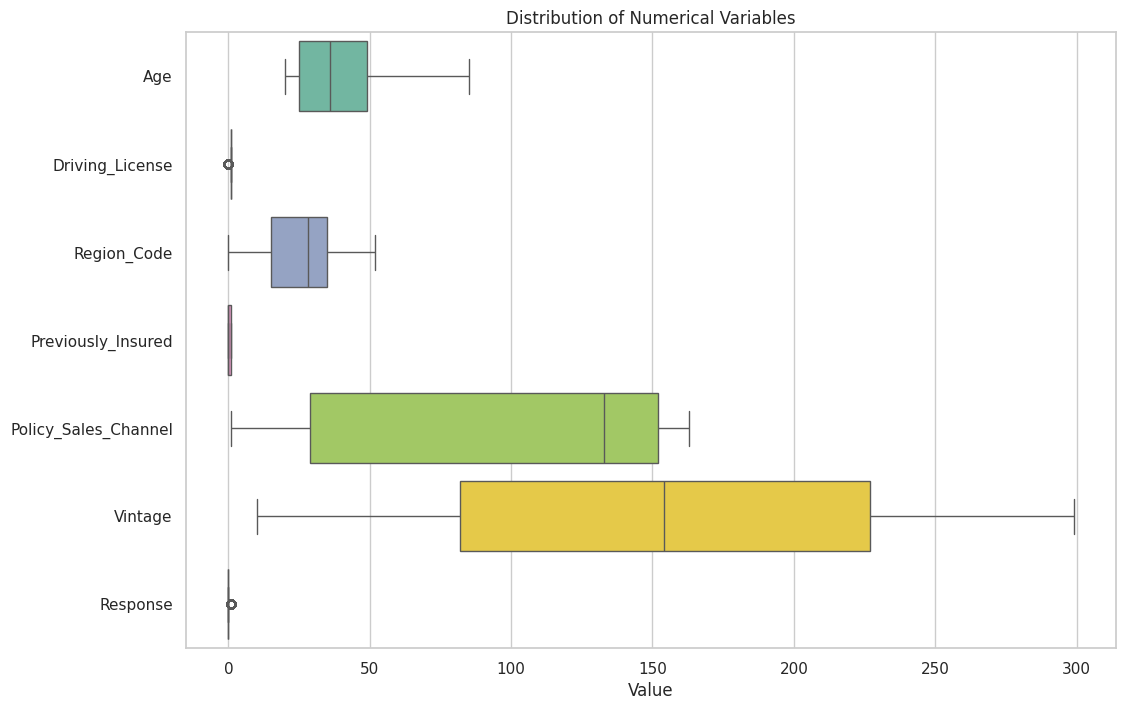

In [ ]:
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
                  'Policy_Sales_Channel', 'Vintage', 'Response']
# numerical_cols: Selects numerical columns from the dataset: Age, Driving_License, Region_Code, Previously_Insured, Policy_Sales_Channel, Vintage, and Response.

plt.figure(figsize=(12, 8))
sns.boxplot(data=insurance_cust[numerical_cols], orient='h', palette='Set2')
# sns.boxplot(): Plots the box plot for the selected numerical columns.
# orient='h': Displays the boxes horizontally.
# palette='Set2': Applies a soft color palette.

plt.title('Distribution of Numerical Variables')
plt.xlabel('Value')
plt.show()

####
- The box plot shows the distribution of several numerical variables. Each box represents the middle 50% of the data, with whiskers extending to the minimum and maximum values. Variables like Age and Region Code show a wider range of values compared to binary variables like Driving License and Previously Insured.

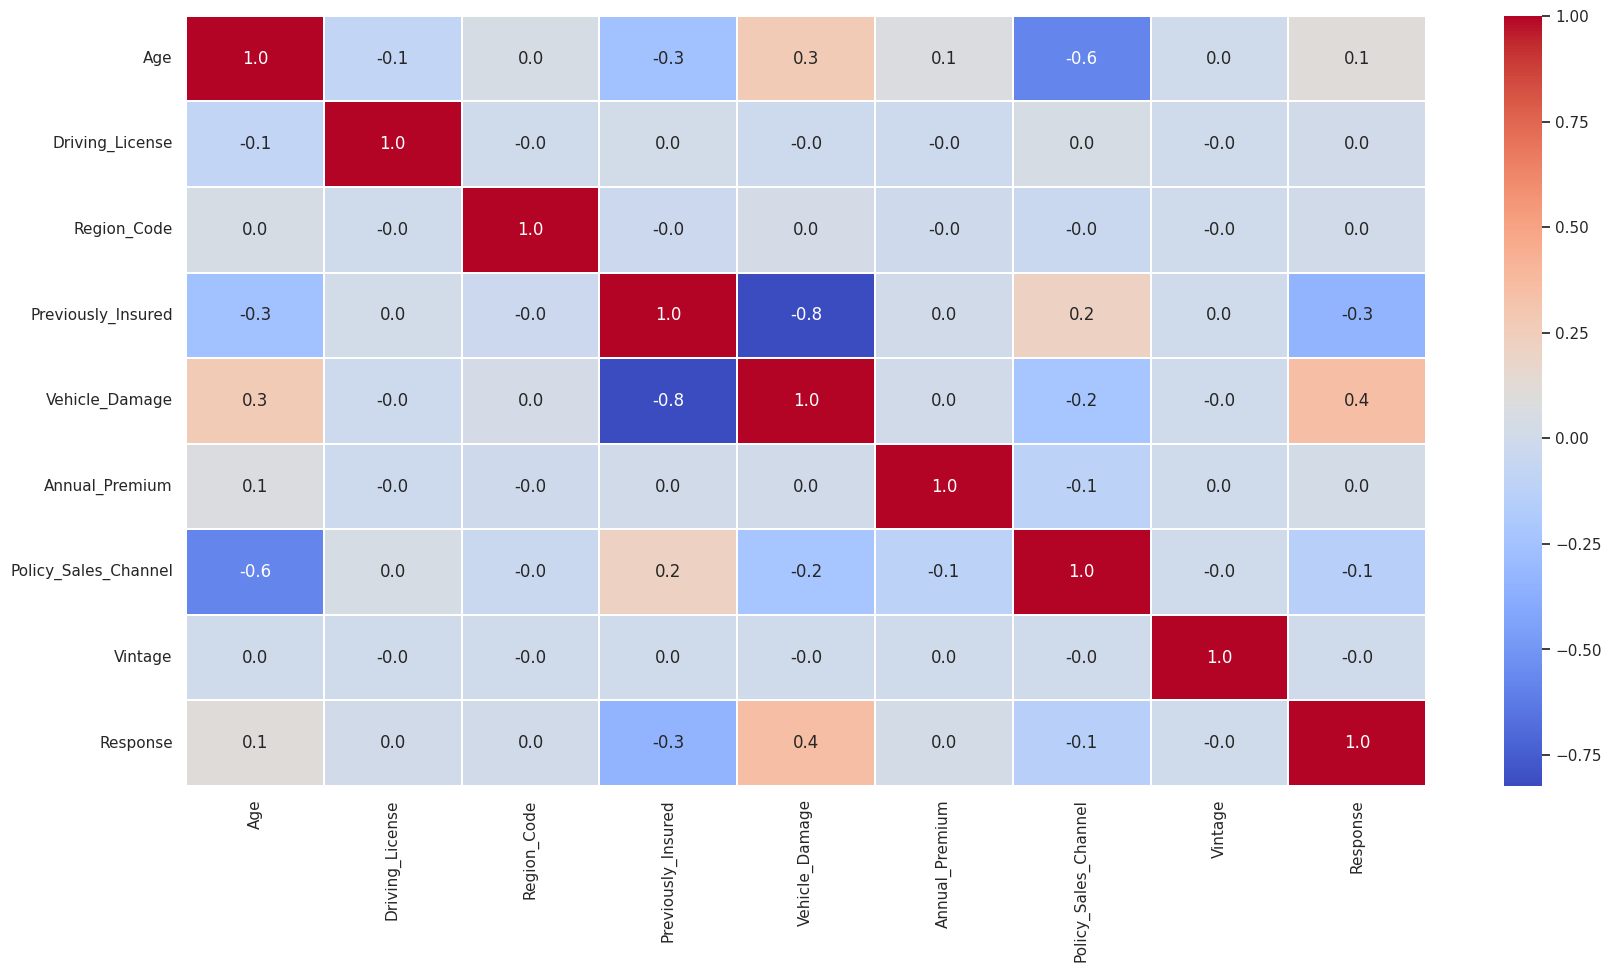

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# LabelEncoder: Encodes the Response column into numeric values (e.g., 0 and 1

insurance_cust['Response'] = encoder.fit_transform(insurance_cust['Response'])
insurance_cust = pd.get_dummies(insurance_cust, drop_first=True)
# pd.get_dummies(drop_first=True): Converts categorical variables into dummy variables, avoiding multicollinearity.

numeric_data = insurance_cust.select_dtypes(include=['number'])
# select_dtypes(include=['number']): Filters only numerical columns for correlation analysis.
correlation_matrix = numeric_data.corr()
# numeric_data.corr(): Computes pairwise correlation coefficients between numerical columns.

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.1)
# annot=True: Displays correlation values on the heatmap.
# cmap='coolwarm': Uses a blue-to-red color gradient.
# fmt=".1f": Formats values to one decimal point.
# linewidths=0.1: Adds thin lines between cells.


plt.show()



#### 
- The image shows a correlation matrix. It visualizes the strength and direction of relationships between variables using colors. Red indicates strong positive correlation, blue indicates strong negative correlation, and white/gray indicates weak or no correlation.

In [ ]:
print(insurance_cust.columns)

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Gender_Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')


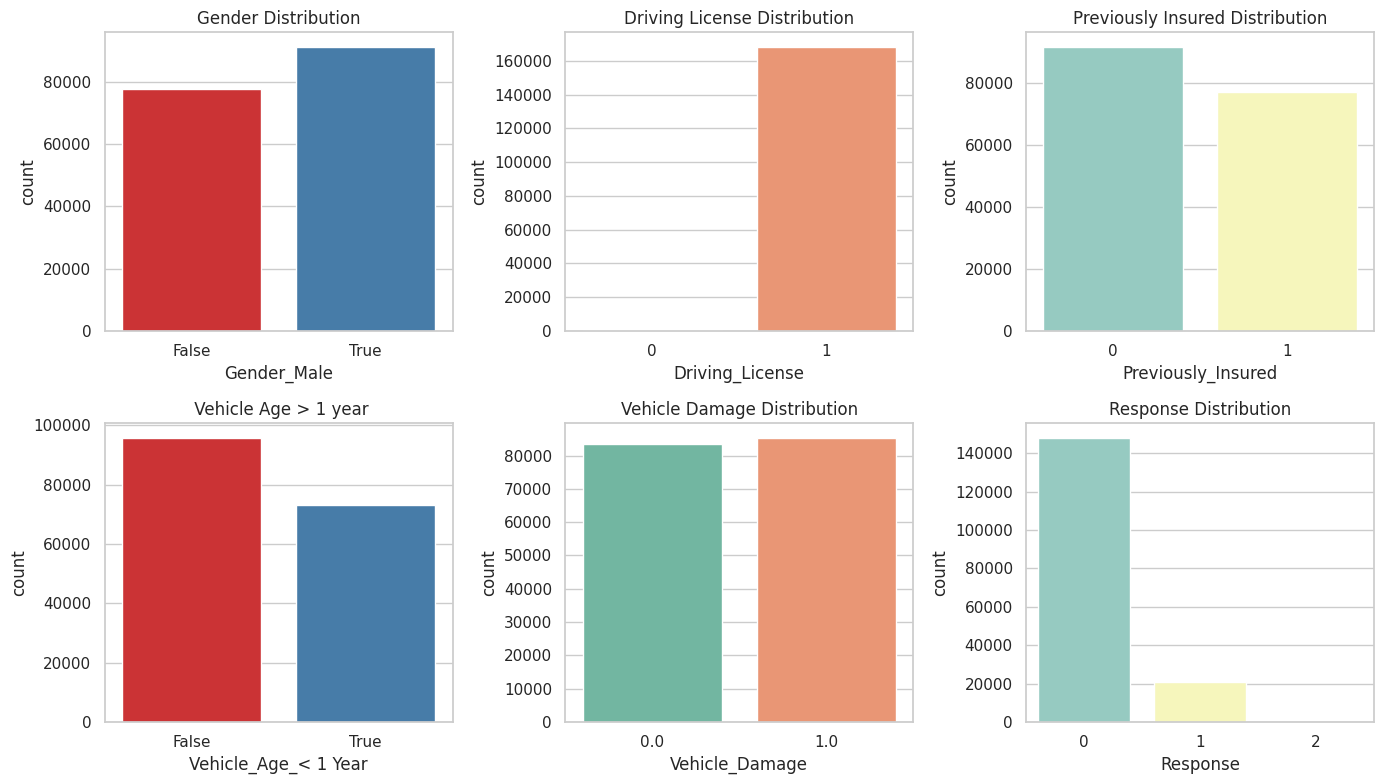

In [ ]:
plt.figure(figsize=(14, 8))

# plt.subplot(2, 3, i): Arranges plots in a 2x3 grid (2 rows, 3 columns).
#Each subplot visualizes the count distribution for a specific variable:
#1st: Gender_Male (distribution by gender).
#2nd: Driving_License (who holds a license).
#3rd: Previously_Insured (insurance history).
#4th: Vehicle_Age_< 1 Year (vehicle age group).
#5th: Vehicle_Damage (damage history).
#6th: Response (target variable distribution).

# sns.countplot(): Visualizes the count of each category in the respective variable.
# palette='Set1/Set2/Set3': Uses distinct color palettes for each plot.
# plt.title(): Sets a title for each plot.

plt.subplot(2, 3, 1)
sns.countplot(x='Gender_Male', data=insurance_cust, palette='Set1')
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='Driving_License', data=insurance_cust, palette='Set2')
plt.title('Driving License Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Previously_Insured', data=insurance_cust, palette='Set3')
plt.title('Previously Insured Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Vehicle_Age_< 1 Year', data=insurance_cust, palette='Set1')
plt.title(' Vehicle Age < 1 year')

plt.subplot(2, 3, 5)
sns.countplot(x='Vehicle_Damage', data=insurance_cust, palette='Set2')
plt.title('Vehicle Damage Distribution')

plt.subplot(2, 3, 6)
sns.countplot(x='Response', data=insurance_cust, palette='Set2')
plt.title('Response Distribution')

plt.tight_layout()
# plt.tight_layout(): Ensures plots don’t overlap and are evenly spaced.
plt.show()

####
-Provides a quick overview of category distributions across key variables.
1. Gender Distribution: Displays the count of males (True) and females (False) in the dataset. Males are slightly higher.  

2. Driving License Distribution: Shows the count of individuals with a driving license (1) vs. without (0). Most have a driving license.  

3. Previously Insured Distribution:   Indicates whether individuals were previously insured (1) or not (0). More individuals are uninsured.  

4. Vehicle Age (>1 year):  Compares the count of vehicles older and newer than one year. Older vehicles are more common.  

5. Vehicle Damage Distribution:  Represents whether a vehicle was previously damaged (1) or not (0). The count is nearly equal.  

6. Response Distribution:  Shows the target variable: response to insurance offers. Most responses are negative (0).re negative (0).

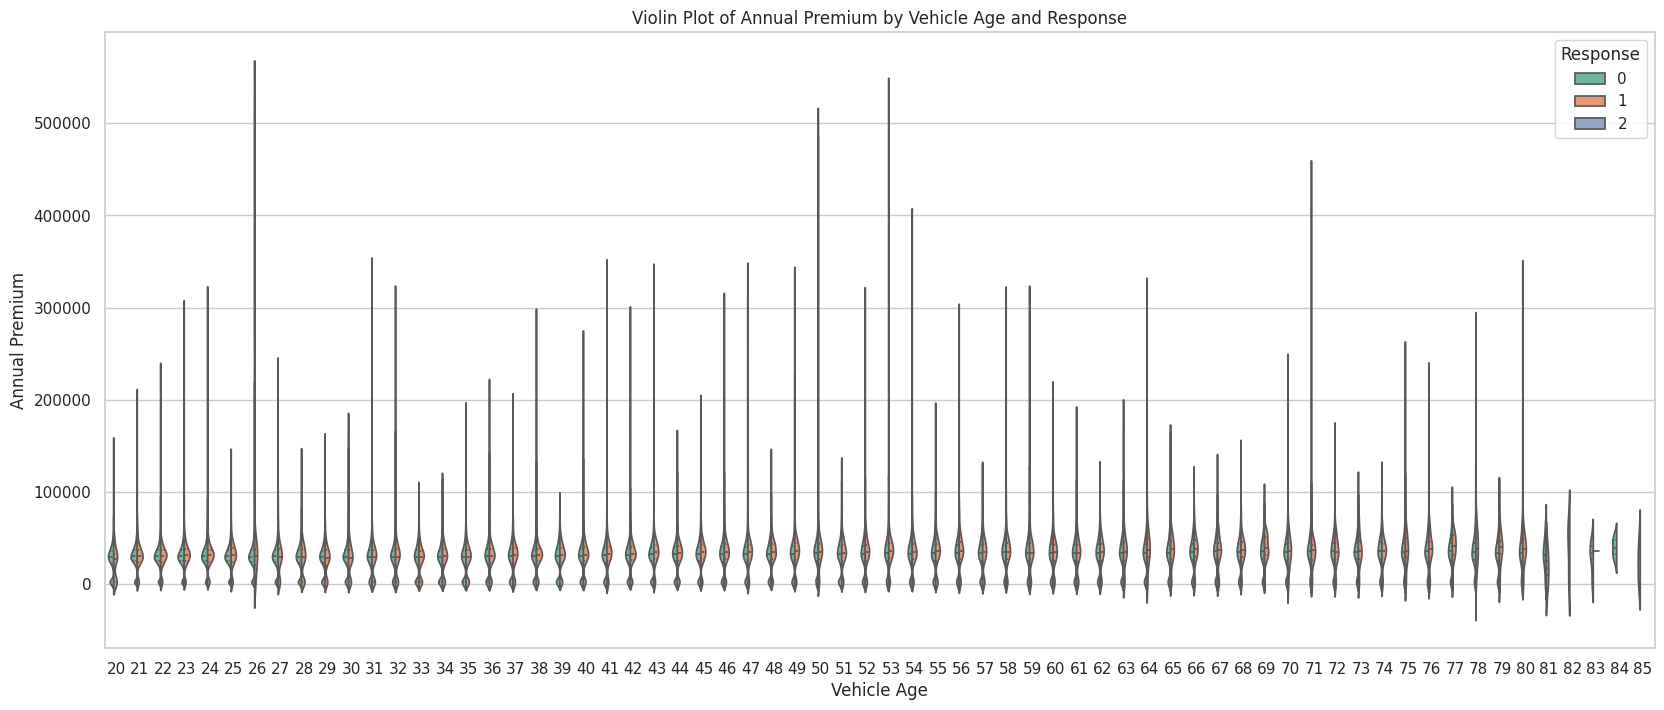

In [ ]:
plt.figure(figsize=(20, 8))
sns.violinplot(x='Age', y='Annual_Premium', data=insurance_cust, hue='Response', split=True, palette='Set2', inner='quartile')
# sns.violinplot(): Displays the distribution of Annual_Premium for each Age category.
# hue='Response': Adds color distinction for Response values (e.g., 0 and 1).
# split=True: Splits the violin plot for the Response categories within each Age.
# inner='quartile': Shows quartiles within the plot.

plt.title('Violin Plot of Annual Premium by Vehicle Age and Response')
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
# Title and Labels: Adds context with a title, x-axis (Age), and y-axis (Annual Premium

plt.show()

####
- The violin plot shows the distribution of Annual Premiums by Vehicle Age and Response. The distributions are generally right-skewed, with higher premiums associated with Response category 2. The plot helps visualize how Annual Premiums vary across different combinations of Vehicle Age and Response.

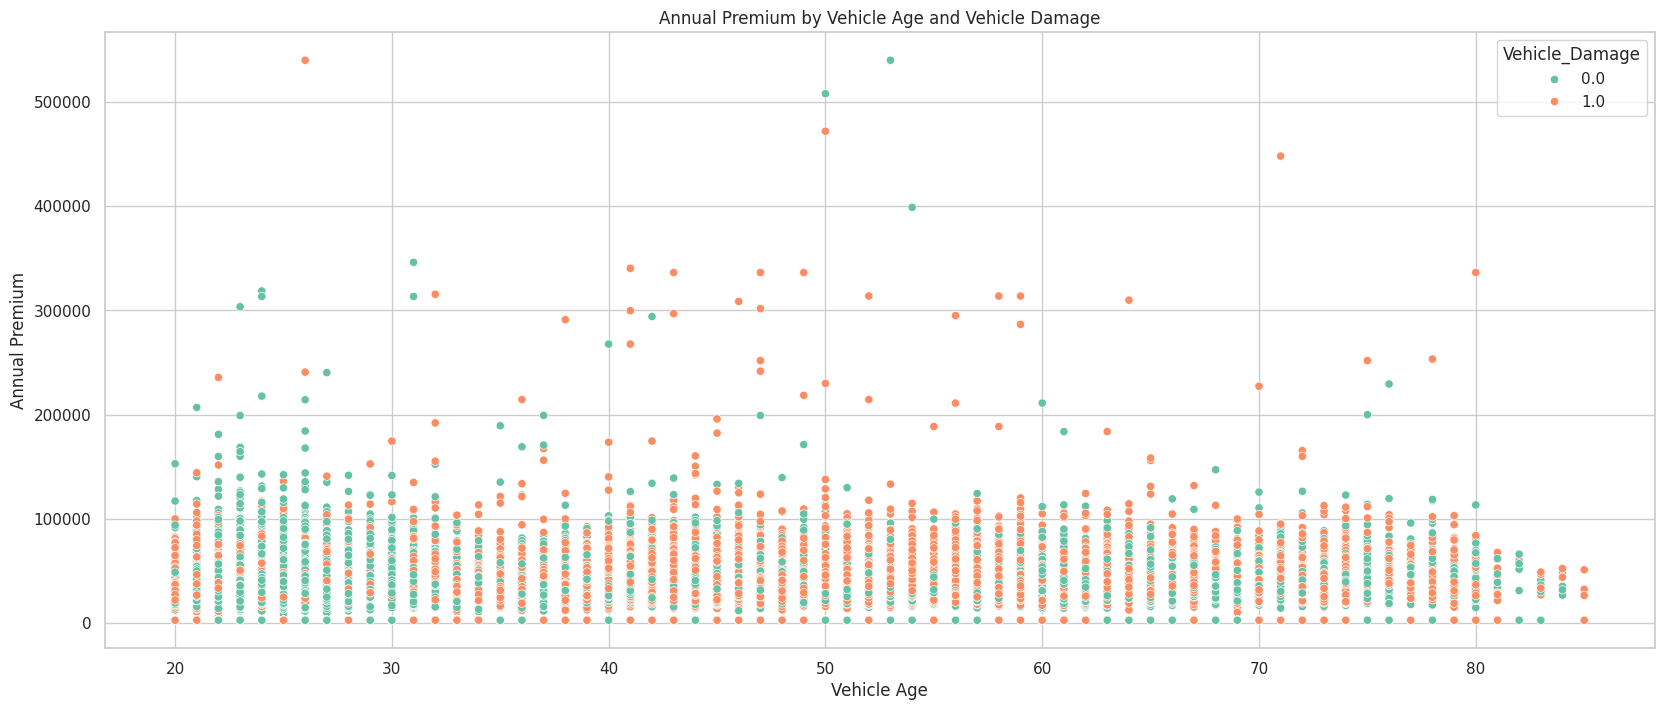

In [ ]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='Age', y='Annual_Premium', hue='Vehicle_Damage', data=insurance_cust, palette='Set2')
# sns.scatterplot(): Creates a scatter plot with points representing individual data samples.
# x='Age': The x-axis represents the age of the customer.
# y='Annual_Premium': The y-axis represents the annual premium amount.
# hue='Vehicle_Damage': Differentiates points by whether the vehicle has been damaged (0 for No, 1 for Yes).
#palette='Set2': Uses a color palette to represent Vehicle_Damage

plt.title('Annual Premium by Vehicle Age and Vehicle Damage')
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
# plt.xlabel() and plt.ylabel(): Labels the x-axis (Vehicle Age) and y-axis (Annual Premium)

plt.show()

####
- The scatter plot shows the relationship between Annual Premium, Vehicle Age, and Vehicle Damage. Vehicles with damage tend to have higher premiums. While there's no strong linear relationship with Vehicle Age, older vehicles might have slightly higher premiums.

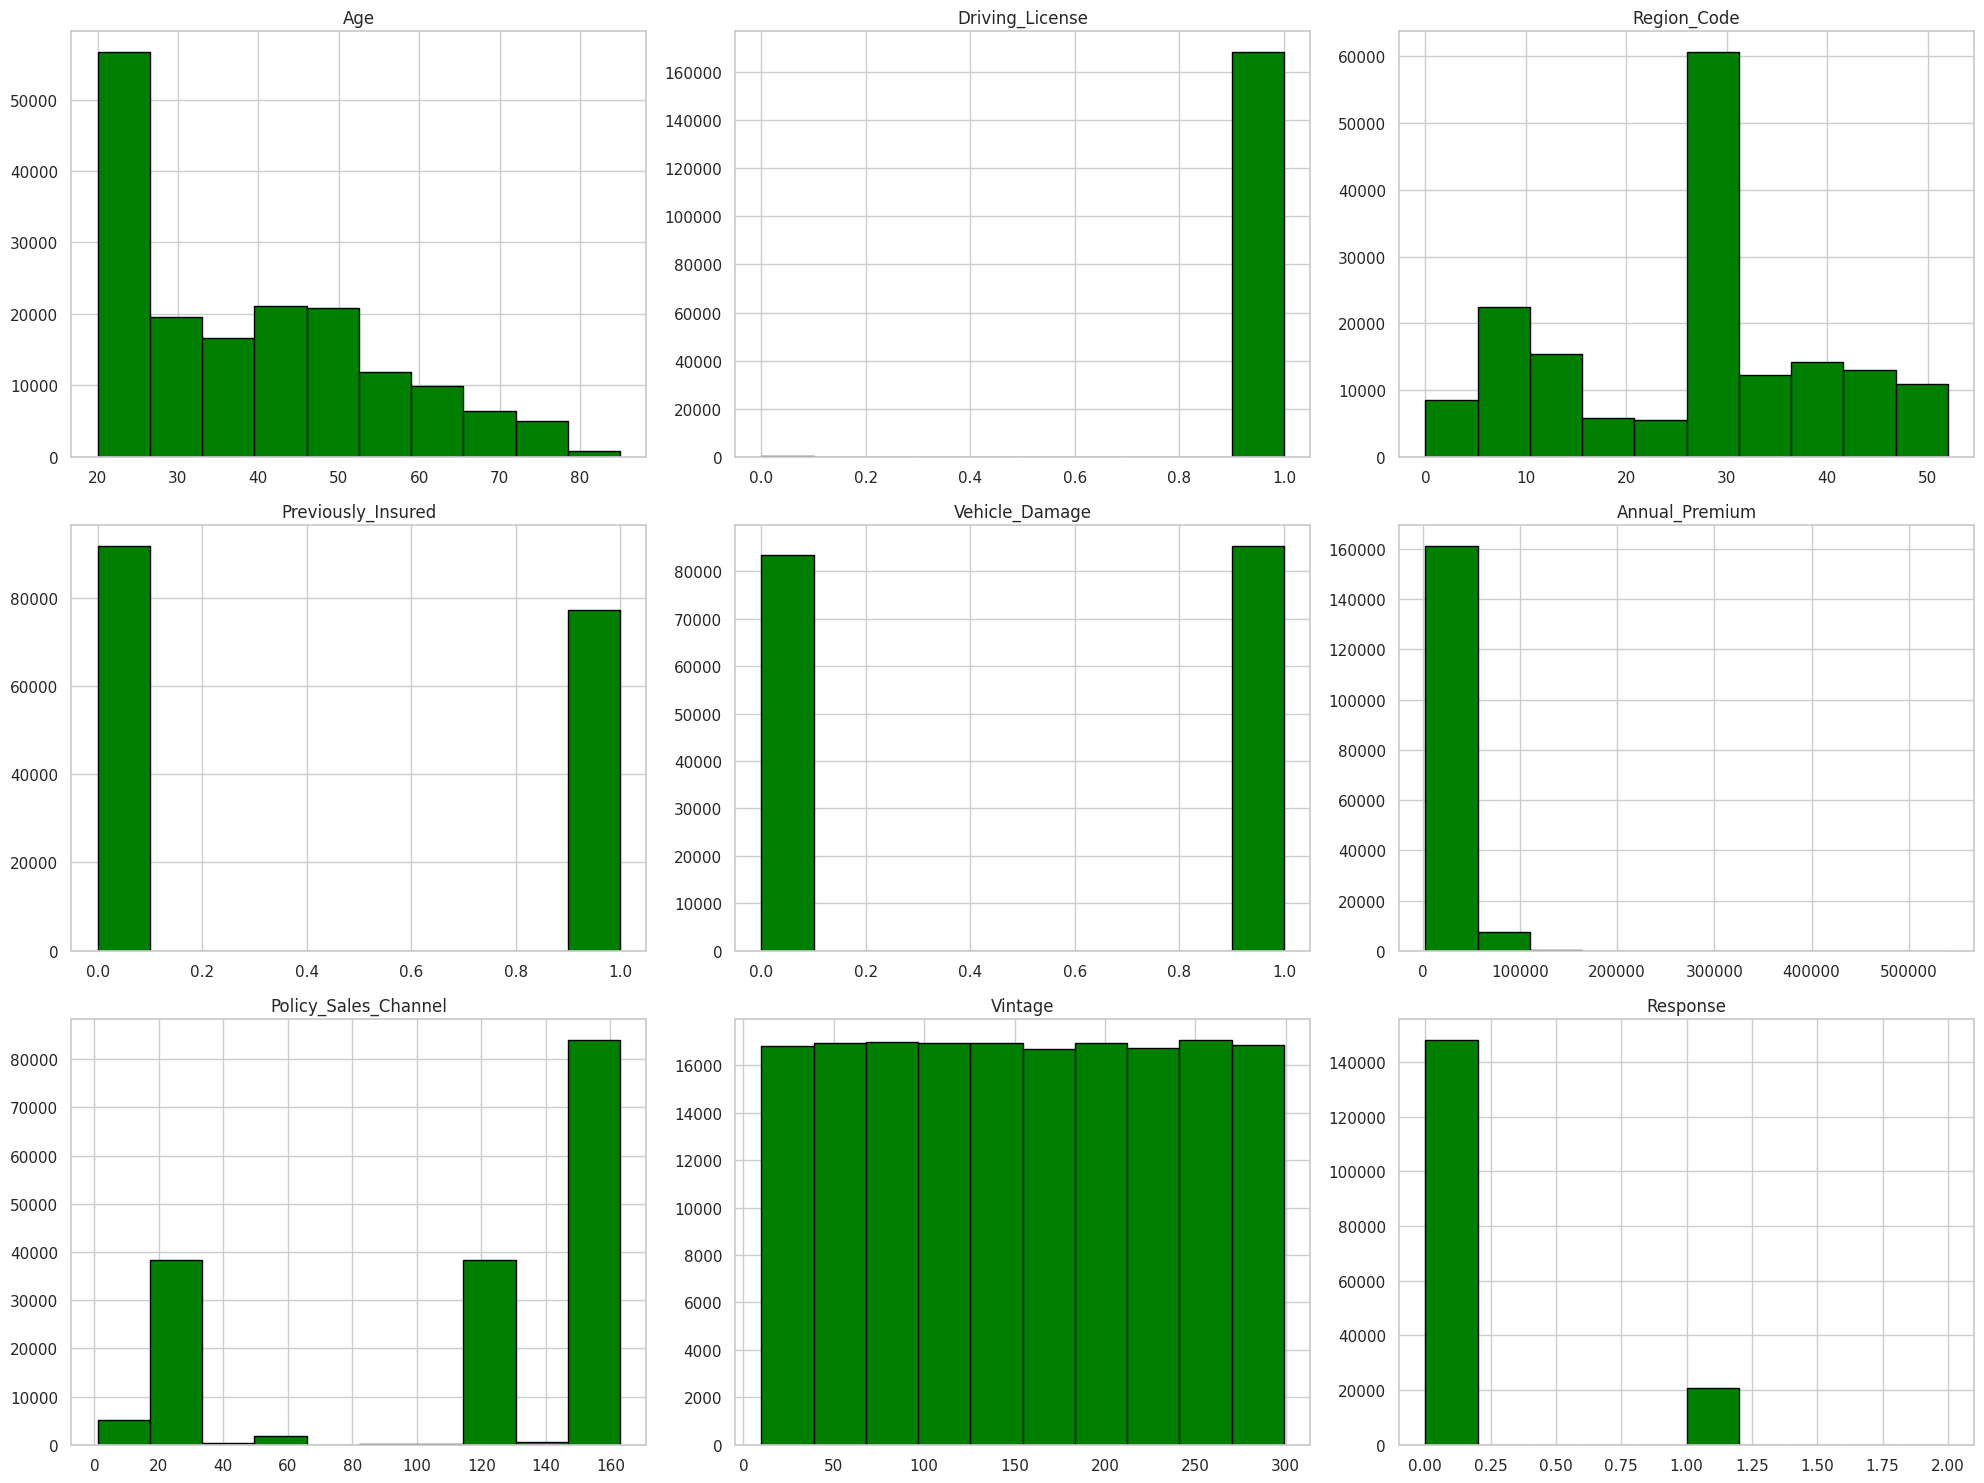

In [ ]:
insurance_cust.hist(figsize=(20, 15), color='green', edgecolor='black')
#insurance_cust.hist(): This generates a histogram for the dataset insurance_cust.

plt.gcf().set_facecolor('white')
# plt.gcf().set_facecolor('white'): Sets the background color of the figure to white

plt.tight_layout()
# plt.tight_layout(): Adjusts the layout to ensure elements fit nicely within the figur

plt.show()

####
-1.Age: Most customers are aged between 20-30, with numbers decreasing as age increases.

2.Driving License: Almost all customers have a driving license.

3.Region Code: Customers are concentrated in a few specific region codes, especially around 28-30.

4.Previously Insured: More customers are not previously insured (0) than insured (1).

5.Vehicle Damage: Equal distribution of customers with and without vehicle damage.

6.Annual Premium: Most premiums are concentrated below ₹100,000.

7.Policy Sales Channel: Certain sales channels dominate, especially near codes 20, 120, and 150.

8.Vintage: Customer tenure is evenly distributed across the range.

9.Response: Majority did not respond positively (0) to the offer, with few positive responses (1).

## 5.Data Preprocessing

In [ ]:
y=insurance_cust_dummies["Response"].values
x=insurance_cust_dummies.drop(columns=["Response"])

In [ ]:
insurance_cust_dummies.isnull().sum()

Age                      0
Driving_License          0
Region_Code              0
Previously_Insured       0
Vehicle_Damage           1
Annual_Premium           1
Policy_Sales_Channel     1
Vintage                  1
Response                 1
Gender_Female            0
Gender_Male              0
Vehicle_Age_1            0
Vehicle_Age_1-2 Year     0
Vehicle_Age_< 1 Year     0
Vehicle_Age_> 2 Years    0
dtype: int64

In [ ]:
insurance_cust_dummies.dropna(inplace=True)

In [ ]:
y

array([ 1.,  0.,  1., ...,  0.,  0., nan])

####  
- Scaling all values are similar

In [ ]:
from sklearn.preprocessing import MinMaxScaler
features=x.columns.values
# features = x.columns.values: Stores the column names of x in the features variable.

scaler=MinMaxScaler(feature_range=(0,1))
# scaler = MinMaxScaler(feature_range=(0, 1)): Initializes the Min-Max scaler with the range [0, 1].

scaler.fit(x)
# scaler.fit(x): Fits the scaler on the feature values in x.

x=pd.DataFrame(scaler.transform(x))
# x = pd.DataFrame(scaler.transform(x)): Scales the features and converts the result back into a DataFrame.

x.columns=features
# x.columns = features: Reassigns the original column names to the scaled DataFrame.

x.head()


Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Damage  \
0  0.369231              1.0     0.538462                 0.0             1.0   
1  0.861538              1.0     0.057692                 0.0             0.0   
2  0.415385              1.0     0.538462                 0.0             1.0   
3  0.015385              1.0     0.211538                 1.0             0.0   
4  0.138462              1.0     0.788462                 1.0             0.0   

   Annual_Premium  Policy_Sales_Channel   Vintage  Gender_Female  Gender_Male  \
0        0.070366              0.154321  0.716263            0.0          1.0   
1        0.057496              0.154321  0.598616            0.0          1.0   
2        0.066347              0.154321  0.058824            0.0          1.0   
3        0.048348              0.932099  0.667820            0.0          1.0   
4        0.046259              0.932099  0.100346            1.0          0.0   

   Vehicle_Age_1  Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  \
0            0.0                   0.0                   0.0   
1            0.0                   1.0                   0.0   
2            0.0                   0.0                   0.0   
3            0.0                   0.0                   1.0   
4            0.0                   0.0                   1.0   

   Vehicle_Age_> 2 Years  
0                    1.0  
1                    0.0  
2                    1.0  
3                    0.0  
4                    0.0

####  
- Training and Test Set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
#x: Features (input data) , y: Target variable (output).
# test_size=0.2: 20% of the data is used for testing, and 80% for training.
# random_state=101: Ensures reproducibility by fixing the random seed.

x_train.shape,x_test.shape
# x_train.shape, x_test.shape: Displays the shape (number of rows and columns) of the training and testing feature sets.

((135124, 14), (33782, 14))

In [ ]:
from imblearn.over_sampling import SMOTE
# SMOTE (Synthetic Minority Over-sampling Technique)

from collections import Counter
# Imports the Counter class from the collections module.Counter helps count the frequency of different classes in your dataset.

 #### Predictive modeling - ML Algorithms

--------------------------------------------------------------------------------------------------------
Developing 
- Logistic Regression, 
- Random Forest, 
- SVM, 
- ADA Boost and 
- XG Boost

In [ ]:
x = insurance_cust.drop(['Response'], axis = 1)
# axis=1: Specifies that a column (not a row) is being dropped.

y = insurance_cust.loc[:,'Response'].values
# Extracts the Response column as the target variable.
# .values: Converts the column into a NumPy array for easier manipulation during model training.

In [ ]:
x.dropna(inplace=True)
# x.dropna(inplace=True) removes rows with missing values from x directly.

In [ ]:
from sklearn.impute import SimpleImputer
# SimpleImputer(strategy='mean'): Replaces missing values in x with the mean.

imputer = SimpleImputer(strategy='mean') # Choose a strategy: 'mean', 'median', 'most_frequent'

# Impute missing values in 'x' before dropping rows in 'y'
x = imputer.fit_transform(x)
# x = imputer.fit_transform(x): Applies the imputer and replaces missing values.

# Now, align 'y' with 'x' after imputation:
x = pd.DataFrame(x)  # Convert x back to DataFrame for indexing
x.reset_index(drop=True, inplace=True) # Reset index of x
y = y[x.index]  # y = y[x.index]: Aligns y with the updated index of x.

# Now apply SMOTE
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))


x_res, y_res = sm.fit_resample(x, y)
# sm.fit_resample(x, y): Balances the dataset by oversampling the minority class.

print('Resampled dataset shape %s' % Counter(y_res))
# Prints dataset shape before and after resampling using Counter.

Original dataset shape Counter({0: 148197, 1: 20708})
Resampled dataset shape Counter({1: 148197, 0: 148197})


In [ ]:
#response_counts = insurance_cust['Response'].value_counts()
#plt.pie(response_counts, labels=['No Response', 'Positive Response'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)

In [ ]:
insurance_cust.Response.value_counts()

Response
0    148197
1     20708
2         1
Name: count, dtype: int64

#### 
- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#  imports the Logistic Regression model from scikit-learn.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
#x: Features (input data) , y: Target variable (output).
# test_size=0.2: 20% of the data is used for testing, and 80% for training.
# random_state=101: Ensures reproducibility of the split.

x_train.shape,x_test.shape
# Displays the shape (rows and columns) of the training and testing feature sets.

((135124, 12), (33781, 12))

In [ ]:
x_res.shape,y_res.shape
# x_res.shape and y_res.shape display the shape of the resampled dataset after applying SMOTE
#x_res.shape=Shows the number of rows (samples) and columns (features) in the resampled feature set. y_res.shape=Shows the number of rows (samples) in the resampled target set.

((296394, 12), (296394,))

In [ ]:
# Trains a Logistic Regression model:
model=LogisticRegression()
model.fit(x_train,y_train)
# Fits the model to the training data.


LogisticRegression()

In [ ]:
from sklearn import metrics

In [ ]:
prediction_test=model.predict(x_test)
# Predicts the target values for the test set (x_test).

print(metrics.accuracy_score(y_test,prediction_test))
# metrics.accuracy_score(y_test, prediction_test)=Compares the true values (y_test) with the predicted values (prediction_test) and calculates the accuracy of the model.

0.8792516503359877


Axes(0.125,0.11;0.775x0.77)


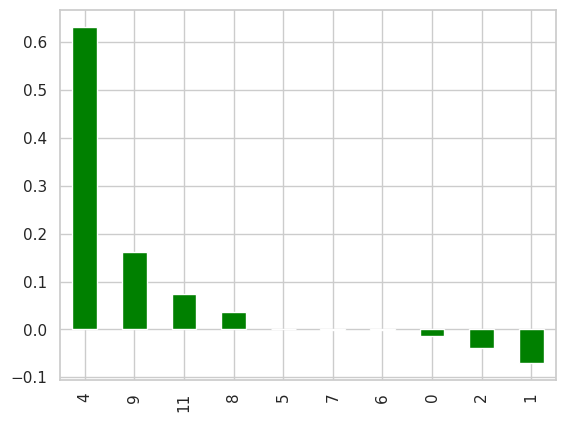

In [ ]:
# To get weight of all variables
weights=pd.Series(model.coef_[0],index=x.columns.values)
# model.coef_[0]: Gets the feature weights.

print(weights.sort_values(ascending=False)[:10].plot(kind="bar",color="green"))
# weights.sort_values(ascending=False)[:10].plot(kind="bar", color="green"): Plots the top 10 coefficients as a bar chart.

plt.show()

Axes(0.125,0.11;0.775x0.77)


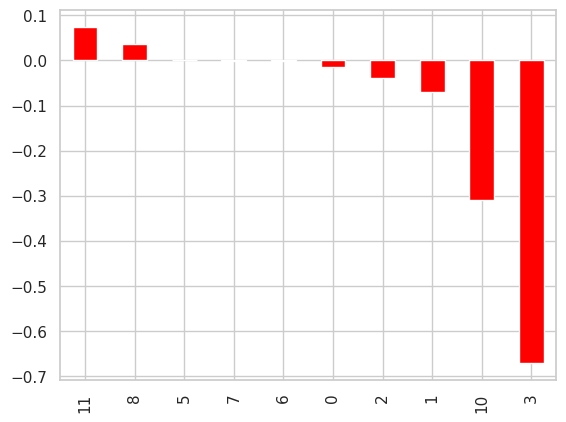

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))
# weights.sort_values(ascending=False)[-10:]: Selects the bottom 10 features.
# .plot(kind='bar', color='red'): Plots them as a red bar chart.

plt.show()

#### 
- Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
# train_test_split(x, y, test_size=0.2, random_state=101):Splits the dataset into 80% training and 20% testing.

model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=101, max_leaf_nodes=30)
# Initializes a Random Forest Classifier with 1000 trees, out-of-bag scoring (oob_score=True), parallel computation (n_jobs=-1),and a maximum of 30 leaf nodes per tree.

model_rf.fit(x_train, y_train)
# Trains the Random Forest model on the training dat


# Make predictions

prediction_test = model_rf.predict(x_test)
# prediction_test = model_rf.predict(x_test):Predicts the target values for the test set.

print(metrics.accuracy_score(y_test, prediction_test))
# metrics.accuracy_score(y_test, prediction_test):Calculates and prints the accuracy score of the model.

0.8796956869246025


In [ ]:
print(confusion_matrix(y_test,preds))
# y_test: The true target values.
# preds: The predicted values from the model.

[[29489   228]
 [ 3893   171]]


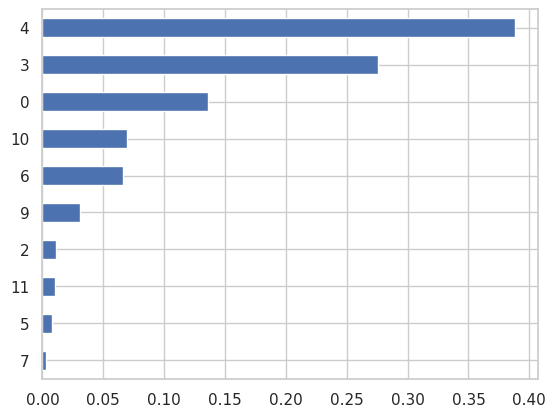

In [ ]:
importances = model_rf.feature_importances_
# Retrieves the feature importance values (how much each feature contributes to the model).

weights = pd.Series(importances,index=x.columns.values)
# Converts the importances into a pandas Series with feature names as indices.

weights.sort_values()[-10:].plot(kind = 'barh')
# Sorts the importances in ascending order and selects the bottom 10 features.Plots the bottom 10 features as a horizontal bar chart.

plt.show()
# Displays plota

####
 -  Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
# Initializes the SVM model with default parameters.

model_svm.fit(x_train,y_train)
# Trains the SVM model on the training data (x_train for features and y_train for the target).

#preds = model.svm.predict(x_test)
#metrics.accuracy_score(y_test, preds)

SVC()

In [ ]:
preds = model_svm.predict(x_test)
# Makes predictions using the trained SVM model on the test data (x_test)

metrics.accuracy_score(y_test, preds)
# Compares the true values (y_test) with the predicted values (preds) and calculates the accuracy of the modela.

0.8796956869246025

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))
# Compares the true values (y_test) with the predicted values (preds) and generates a confusion matrix.

# The confusion matrix shows:
#      -  TN (True Negatives): Correctly predicted negative class.
#      -  FP (False Positives): Incorrectly predicted positive class.
#      -  FN (False Negatives): Incorrectly predicted negative class.
#      -  TP (True Positives): Correctly predicted positive class.

[[29717     0]
 [ 4064     0]]


In [ ]:
#ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=insurance_cust,
                 #estimator=lambda x: sum(x==0)*100.0/len(x))
#plt.show()
print(classification_report(y_test, preds))
# prints the classification report for the SVM model's predictions

#   Precision: The ratio of correctly predicted positive observations to the total predicted positives.
#   Recall (Sensitivity): The ratio of correctly predicted positive observations to all the actual positives.
#   F1-Score: The weighted average of precision and recall.
#   Support: The number of actual occurrences of the class in the dataset

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     29717
           1       0.00      0.00      0.00      4064

    accuracy                           0.88     33781
   macro avg       0.44      0.50      0.47     33781
weighted avg       0.77      0.88      0.82     33781



####  
- ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# Initializes the AdaBoost model with the default parameters
# n_estimators = 50 Number of boosting rounds (default value)
# base_estimator = DecisionTreeClassifier:The base classifier used  (default value)

model.fit(x_train,y_train)
# Trains the AdaBoost model on the training data.

preds = model.predict(x_test)
# Makes predictions on the test data.

metrics.accuracy_score(y_test, preds)
# Compares the true values (y_test) with the predicted values (preds) and prints the accuracy score.

0.8796660844853615

In [ ]:
print(classification_report(y_test, preds))
# prints the classification report for the AdaBoost model's predictionn

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     29717
           1       0.43      0.04      0.08      4064

    accuracy                           0.88     33781
   macro avg       0.66      0.52      0.51     33781
weighted avg       0.83      0.88      0.83     33781



In [ ]:
print(confusion_matrix(y_test,preds))
# prints the confusion matrix for the AdaBoost model's predictions

[[29489   228]
 [ 3893   171]]


#### 
-  XGBClassifier

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
# Initializes the XGBoost model with default parameters.

model.fit(x_train, y_train)
# Trains the XGBoost model on the training data.

preds = model.predict(x_test)
# Makes predictions on the test data.

metrics.accuracy_score(y_test, preds)
# Compares the true values (y_test) with the predicted values (preds) and calculates the accuracy.

0.878008347887866

In [ ]:
print(classification_report(y_test, preds))
# prints the classification report for the XGBoost model's predictions

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     29717
           1       0.43      0.04      0.08      4064

    accuracy                           0.88     33781
   macro avg       0.66      0.52      0.51     33781
weighted avg       0.83      0.88      0.83     33781



In [ ]:
print(confusion_matrix(y_test,preds))
# prints the confusion matrix for the XGBoost model's predictions

[[29489   228]
 [ 3893   171]]


In [ ]:
Responses=['0','1']

#### 
- Using data made by **smote**

In [ ]:
x_res_train,x_res_test,y_res_train,y_res_test=train_test_split(x_res,y_res,test_size=0.2,random_state=101)
# Splits the resampled dataset (x_res and y_res) into training and testing sets.
# test_size=0.2: 20% of the data will be used for testing.
#random_state=101: Ensures reproducibility of the split.

x_res_train.shape,x_res_test.shape
# (x_res_train, x_res_test): which tells you how many samples are in each set.

((237115, 12), (59279, 12))

####
- XGB Classifier (Accuracy by using "SMOTE")

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
#Initializes the XGBoost classifier with default parameterss.

model.fit(x_res_train, y_res_train)
# Trains the model using the resampled training data (x_res_train, y_res_train).

preds = model.predict(x_res_test)
# Makes predictions on the resampled test data (x_res_test).

metrics.accuracy_score(y_res_test, preds)
# Compares the true values (y_res_test) with the predicted values (preds) and calculates the accuracy scores

0.9111152347374281

In [ ]:
print(classification_report(y_res_test, preds))
# prints the classification report for the XGBoost model's predictions on the resampled test data

              precision    recall  f1-score   support

           0       0.88      0.96      0.91     29611
           1       0.95      0.87      0.91     29668

    accuracy                           0.91     59279
   macro avg       0.91      0.91      0.91     59279
weighted avg       0.91      0.91      0.91     59279



#### 
- Confusion Matrix

In [ ]:
print(confusion_matrix(y_res_test,preds))
# prints the confusion matrix for the XGBoost model's predictions on the resampled test data

[[28310  1301]
 [ 3968 25700]]


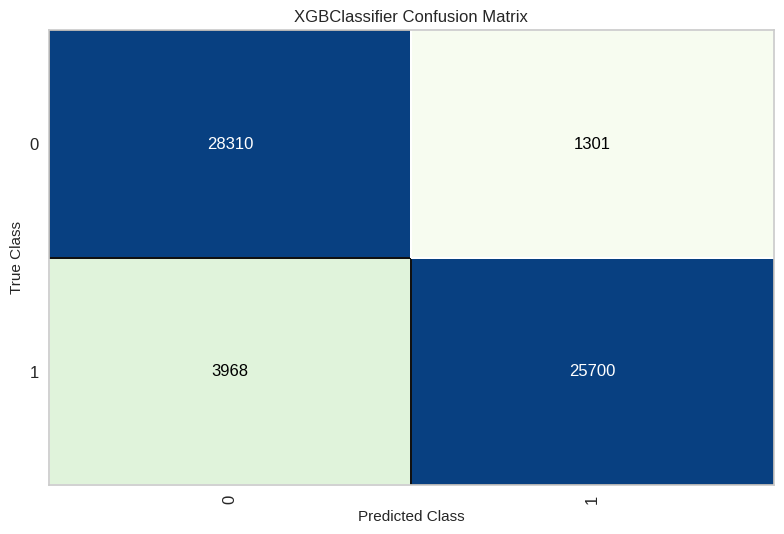

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
from xgboost import XGBClassifier

# Define and train the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
#Initializes an XGBoost classifier with use_label_encoder=False (to suppress warnings) and eval_metric='logloss' (to use logarithmic loss as the evaluation metric),random_state=0 ensures reproducibility.
  

xgb_clf.fit(x_res_train, y_res_train)
# Trains the XGBoost classifier on the resampled training data (x_res_train, y_res_train)


xgb_cm = ConfusionMatrix(xgb_clf, Responses=Responses, cmap='GnBu')
# Creates a confusion matrix visualizer using the trained model.
#Responses=Responses should be replaced with the actual column name or list that corresponds to the response variable (the target column).


xgb_cm.score(x_res_test, y_res_test)
# Evaluate the model using the resampled test data (x_res_test, y_res_test)

# Displays the confusion matrix visualizationm
xgb_cm.show()

####
- ROC-AUC Curve

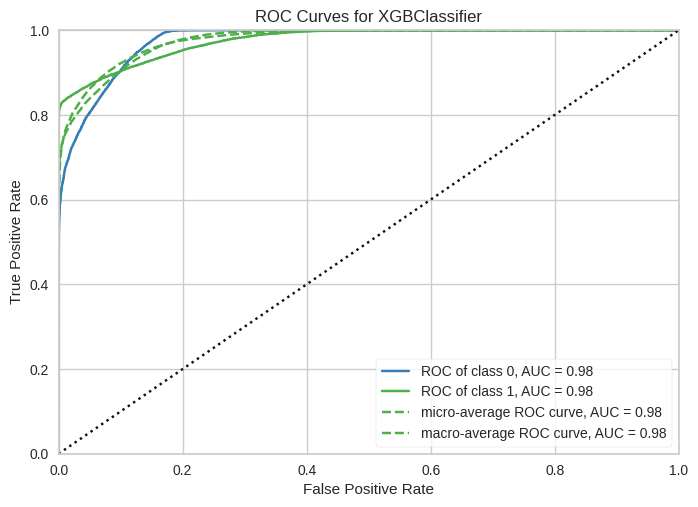

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
from xgboost import XGBClassifier
from yellowbrick.style import set_palette

# Define and train the XGBoost classifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
# Initializes an XGBoost classifier with use_label_encoder=False (to avoid warnings), and eval_metric='logloss' (logarithmic loss as the evaluation metric), random_state=0 ensures reproducibility.

xgb_clf.fit(x_res_train, y_res_train)
# Trains the model using the resampled training data (x_res_train, y_res_train)

# Create the ROC AUC visualizer
visualizer = ROCAUC(xgb_clf, Responses=Responses)
# Replace Responses with the actual response variable name.

# Set a bold color palette
set_palette('bold')

# Fit the visualizer with the resampled training data.
visualizer.fit(x_res_train, y_res_train)        # Fit the training data to the visualizer

# Score the model on the test data
visualizer.score(x_res_test, y_res_test)        # Evaluate the model on the resampled test data

# Finalize and render the figure
visualizer.show()
# Displays the ROC AUC curve.

## Conclusion

####
- This project aims to revolutionize customer engagement and sales efficiency within the insurance industry. By harnessing the power of machine learning, we will develop a predictive model that accurately forecasts customer responses to insurance policy offers. This model will empower the organization with valuable customer insights, enabling the optimization of sales channels and the implementation of highly targeted marketing strategies. Ultimately, this project will drive increased conversion rates and improve the overall efficiency and profitability of the policy sales process.

- Key takeaways:

   This project leverages machine learning for predictive modeling.
   The goal is to improve customer understanding and optimize sales strategies.
   Expected outcomes include improved targeting, channel optimization, and higher conversion rates.